In [16]:
%pylab inline
%matplotlib inline
import pandas as pd
import json

Populating the interactive namespace from numpy and matplotlib


In [17]:
df_tags = pd.read_json('tags.json')
df_tags_by_rows = df_tags.T

In [18]:
df_tags_by_rows.head(1)

,contexts,name,network,paging,sensorpoints,template,total,uri
000581ec-54ef-4a5f-ae10-706817b7efe3,"[{u'tag': u'EBU3B', u'id': 155971, u'keyword':...",Average Supply Flow EBU3B RM-3xxx,BACNET,"{u'limit': 1000, u'offset': 0}","[{u'from_template': True, u'update_period': 0,...",Average Supply Flow,5,https://bd-datas1.ucsd.edu/admin/api/sensors/0...


In [85]:
df_tags_by_rows.network.nunique()

8

In [81]:
df_tags_by_rows.template.nunique()

387

In [78]:
df_tags_by_rows.name.str.split('-').map(lambda x:x[-1])

000581ec-54ef-4a5f-ae10-706817b7efe3                                         3xxx
00138452-8623-11e3-9443-00163e005319                            Unreliable Sensor
0017902c-74c9-11e2-b454-00163e005319                             Occupied Command
001a5e8e-77de-11e2-bad4-00163e005319                             Supply Vel Press
001b6972-77df-11e2-83c4-00163e005319                             Warm/Cool Adjust
001bcf80-74c8-11e2-a42d-00163e005319                      Actual Cooling Setpoint
0020605e-3773-11e3-9be2-00163e005319                         Occupant Information
0023ced6-1726-4f7c-b5c7-9c7bd01de974                                         1xxx
00269112-1d9f-4035-ae46-1874b7c0a54a                Aura Presence Sensor CSE 2150
00331d28-862b-11e3-88a2-00163e005319                                        Stuck
00341b10-f599-11e2-b6b7-00163e005319                        HVAC Zone Information
0034d026-8628-11e3-9443-00163e005319                       Setpoint|Command Error
0035614c-862a-11

In [19]:
dict_col = df_tags_by_rows.pop('contexts')
df_contexts = pd.DataFrame(dict_col)

In [20]:
dict_col = df_contexts.pop('contexts')
df_contexts = pd.concat([df_contexts, dict_col.apply(pd.Series)], axis=1)
df_contexts = pd.DataFrame(df_contexts.stack())

In [21]:
df_contexts.columns = ['inner']
dict_col = df_contexts.pop('inner')
df_contexts = pd.concat([df_contexts, dict_col.apply(pd.Series)], axis=1)
df_contexts_flat = df_contexts.reset_index()

In [22]:
df_contexts_flat.head(5)

,level_0,level_1,id,keyword,tag,uri
0,000581ec-54ef-4a5f-ae10-706817b7efe3,0,155971,building,EBU3B,/admin/api/contexts/155971
1,000581ec-54ef-4a5f-ae10-706817b7efe3,1,2,campus,Main,/admin/api/contexts/2
2,000581ec-54ef-4a5f-ae10-706817b7efe3,2,156189,floor,Flr-3,/admin/api/contexts/156189
3,000581ec-54ef-4a5f-ae10-706817b7efe3,3,1,institution,UCSD,/admin/api/contexts/1
4,000581ec-54ef-4a5f-ae10-706817b7efe3,4,157430,room,RM-3xxx,/admin/api/contexts/157430


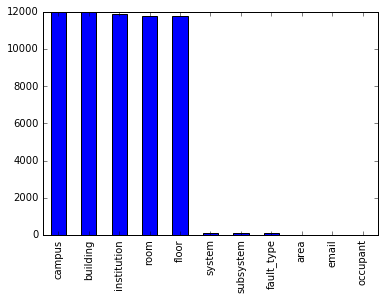

In [23]:
df_contexts_flat.keyword.value_counts().plot(kind='bar')

In [24]:
#df_contexts_flat[(df_contexts_flat.keyword == 'room')].sort_values(by='id')

## Sensorpoints

In [25]:
dict_col = df_tags_by_rows.pop('sensorpoints')
df_sensorpoints = pd.DataFrame(dict_col)

In [26]:
dict_col = df_sensorpoints.pop('sensorpoints')
df_sensorpoints = pd.concat([df_sensorpoints, dict_col.apply(pd.Series)], axis=1)
df_sensorpoints = pd.DataFrame(df_sensorpoints.stack())

In [27]:
df_sensorpoints.columns = ['sensor_inner']
dict_col = df_sensorpoints.pop('sensor_inner')
df_sensorpoints = pd.concat([df_contexts, dict_col.apply(pd.Series)], axis=1)
df_sensorpoints_flat = df_sensorpoints.reset_index()

In [28]:
df_sensorpoints_flat.head(2)

,level_0,level_1,id,keyword,tag,uri,active,created_time,data_type,description,...,max_val,min_val,readonly,shorthand_unit,timeseries_span,timeseries_type,type,unit,update_period,uri
0,000581ec-54ef-4a5f-ae10-706817b7efe3,0,155971,building,EBU3B,/admin/api/contexts/155971,True,2014-08-19T20:56:32+00:00,int,PresentValue,...,0,0,False,None,"{u'begin': u'2014-08-19T20:56:32+00:00', u'end...",continuous,PresentValue,None,0,/admin/api/sensors/000581ec-54ef-4a5f-ae10-706...
1,000581ec-54ef-4a5f-ae10-706817b7efe3,1,2,campus,Main,/admin/api/contexts/2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
dict_col = df_sensorpoints_flat.pop('timeseries_span')
df_sensorpoints_flat = pd.concat([df_sensorpoints_flat, dict_col.apply(pd.Series)], axis=1)
#df_sensorpoints_flat = pd.DataFrame(df_sensorpoints_flat.stack())


In [57]:
df_sensorpoints_flat.head(20)

,level_0,level_1,id,keyword,tag,uri,active,created_time,data_type,description,...,readonly,shorthand_unit,timeseries_type,type,unit,update_period,uri,0,begin,end
0,000581ec-54ef-4a5f-ae10-706817b7efe3,0,155971,building,EBU3B,/admin/api/contexts/155971,True,2014-08-19T20:56:32+00:00,int,PresentValue,...,False,None,continuous,PresentValue,None,0,/admin/api/sensors/000581ec-54ef-4a5f-ae10-706...,NaN,2014-08-19T20:56:32+00:00,2015-12-23T02:18:43+00:00
1,000581ec-54ef-4a5f-ae10-706817b7efe3,1,2,campus,Main,/admin/api/contexts/2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000581ec-54ef-4a5f-ae10-706817b7efe3,2,156189,floor,Flr-3,/admin/api/contexts/156189,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000581ec-54ef-4a5f-ae10-706817b7efe3,3,1,institution,UCSD,/admin/api/contexts/1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000581ec-54ef-4a5f-ae10-706817b7efe3,4,157430,room,RM-3xxx,/admin/api/contexts/157430,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,00138452-8623-11e3-9443-00163e005319,0,155971,building,EBU3B,/admin/api/contexts/155971,False,2014-01-26T11:25:02+00:00,int,PresentValue,...,False,None,continuous,PresentValue,None,NaN,/admin/api/sensors/00138452-8623-11e3-9443-001...,NaN,2014-01-27T02:05:57+00:00,2014-01-27T02:05:57+00:00
6,00138452-8623-11e3-9443-00163e005319,1,2,campus,Main,/admin/api/contexts/2,False,2014-01-26T11:25:02+00:00,string,Related Rules,...,False,None,discrete,Related Rules,None,NaN,/admin/api/sensors/00138452-8623-11e3-9443-001...,NaN,None,None
7,00138452-8623-11e3-9443-00163e005319,2,156956,floor,3250,/admin/api/contexts/156956,False,2014-03-08T00:51:26+00:00,string,Status,...,False,None,discrete,Status,None,NaN,/admin/api/sensors/00138452-8623-11e3-9443-001...,NaN,None,None
8,00138452-8623-11e3-9443-00163e005319,3,1,institution,UCSD,/admin/api/contexts/1,False,2014-01-26T11:25:02+00:00,int,Vote,...,False,None,continuous,Vote,None,NaN,/admin/api/sensors/00138452-8623-11e3-9443-001...,NaN,2014-01-27T02:05:57+00:00,2014-01-27T02:05:57+00:00
9,00138452-8623-11e3-9443-00163e005319,4,157052,room,Damper Position,/admin/api/contexts/157052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cnt_sensor = len(df_sensorpoints_flat.level_0.unique())
cnt_sensor

11992

In [71]:
#df_sensorpoints_flat['keyword']
cnt_room= df_sensorpoints_flat['tag'].loc[df_sensorpoints_flat['keyword'] == 'room'].nunique()
cnt_bldg= df_sensorpoints_flat['tag'].loc[df_sensorpoints_flat['keyword'] == 'building'].nunique()

In [70]:
df_sensorpoints_flat['tag'].loc[df_sensorpoints_flat['keyword'] == 'institution'].unique()

array([u'UCSD', u'Test_Institution', u'Bizwack Institute'], dtype=object)

In [66]:
df_data = pd.DataFrame({'no_of_sensor':[cnt_sensor],'no_of_room':[cnt_room],'no_of_building':[cnt_bldg]})
df_data

,no_of_building,no_of_room,no_of_sensor
0,7,734,11992


In [ ]:
#framelist=[]
#i = 0 
#for  row in df_tags_by_rows['sensorpoints']:
#    i = i+1
#    df  = pd.DataFrame(row)
#    framelist.append(df)
#df_sensorpoints = pd.concat(framelist)

## Contexts

In [ ]:
framelist_contexts=[]

i = 0 
for  row in df_tags_by_rows['contexts']:
    i = i+1
    df_contexts  = pd.DataFrame(row)
    framelist_contexts.append(df_contexts)
df_framelist_contexts = pd.concat(framelist_contexts)

In [ ]:
dict_col = df_sensorpoints.pop('timeseries_span')

In [ ]:
pd.concat([df_sensorpoints, dict_col.apply(pd.Series)], axis=1)

In [ ]:
dict_col = df_sensorpoints.pop('latest_datapoint')
pd.concat([df_sensorpoints, dict_col.apply(pd.Series)], axis=1)

In [ ]:
pd.concat([df_sensorpoints, dict_col.apply(pd.Series)], axis=1)

In [ ]:
df_tags.iloc[[5]].T